In [1]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 

In [2]:
def label_data():
    rows = pd.read_csv('C:/Users/amerf/Downloads/Compressed/electronic_rating-master/Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('2')   #Good
        elif cell == 3:
            labels.append('1')   #Neutral
        else:
            labels.append('0')   #Poor
            
    rows['Label'] = labels
    del rows['Review Votes']
    return rows

In [3]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()
    
    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)
    
    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    data.to_csv('C:/Users/amerf/Downloads/Compressed/electronic_rating-master/putlabel_dataset.csv', index=False)
    return data

In [4]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [5]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    #print "\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions))
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))

In [6]:
if __name__ == '__main__':
    data = label_data()
    data = clean_data(data)
    #prints first 5 rows of the dataset
    print (data.head())    

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews Label  
0       5  I feel so LUCKY to have found this used (phone...     2  
1       4  nice phone, nice up grade from my pantach revu...     2  
2       5                                       Very pleased     2  
3       4  It works good but it goes slow sometimes but i...     2  
4       4  Great phone to replace my lost phone. The only...     2  


Text(0, 0.5, 'Count')

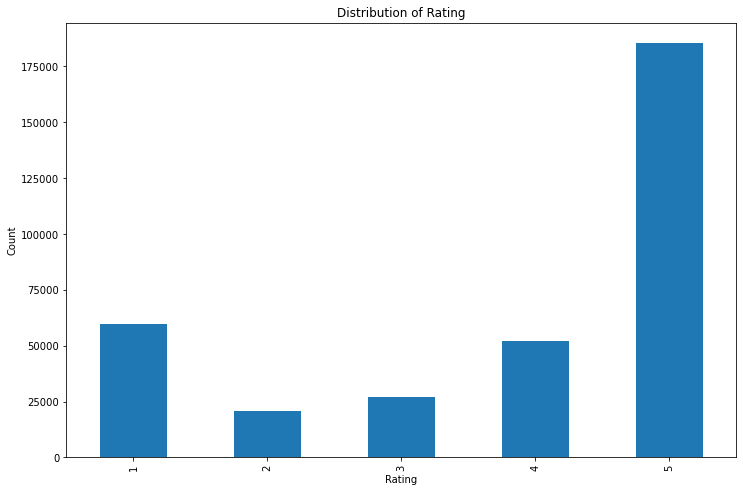

In [7]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(data['Rating'])
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

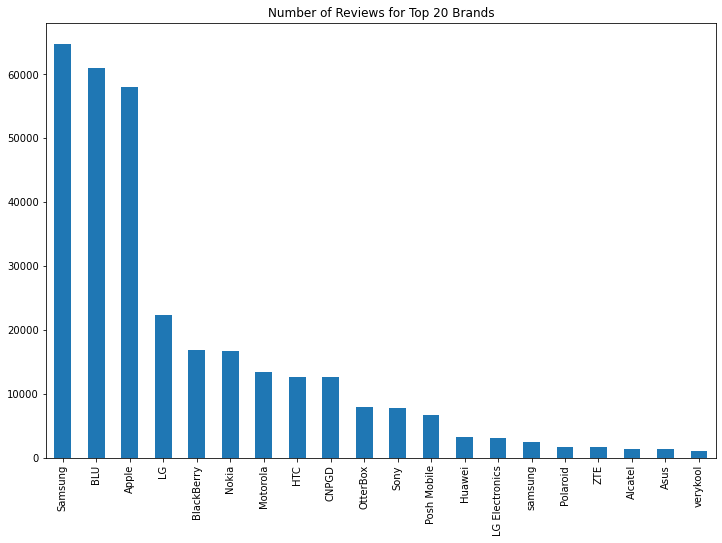

In [8]:
# Plot number of reviews for top 20 brands
brands = data["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

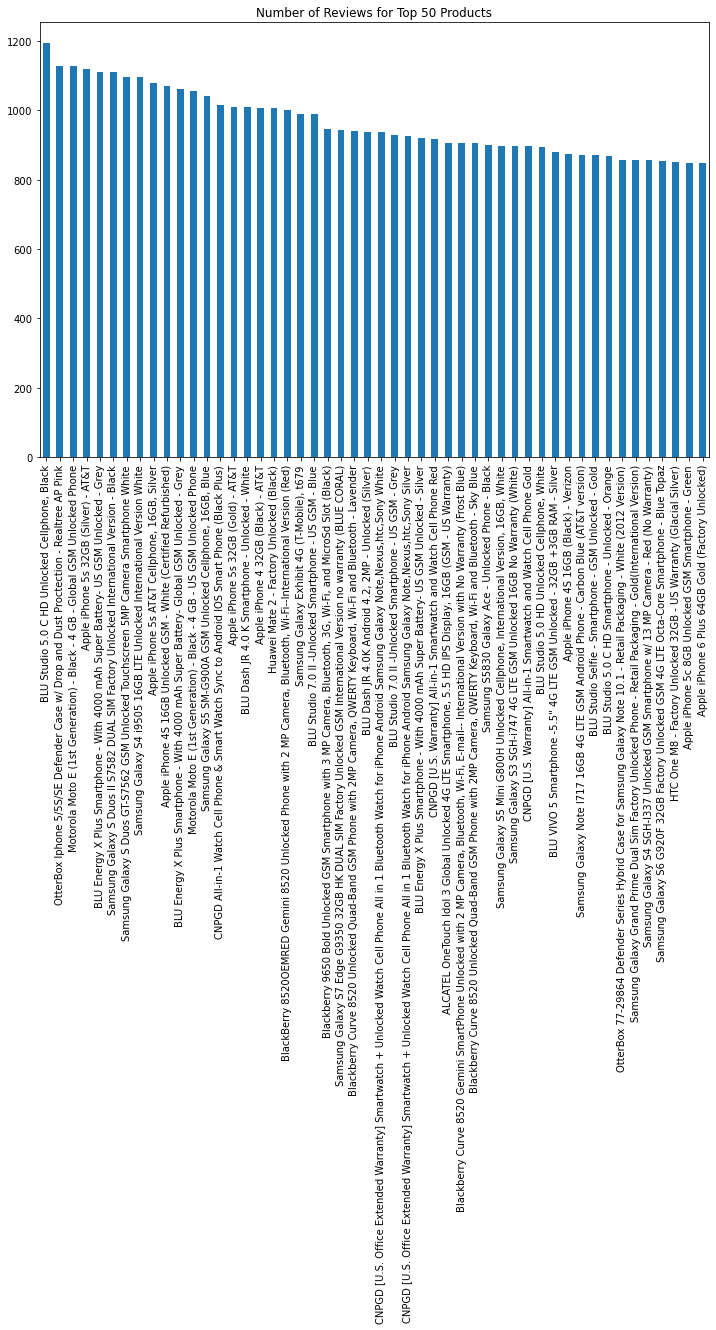

In [9]:
# Plot number of reviews for top 50 products
products = data["Product Name"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0, 0.5, 'Count')

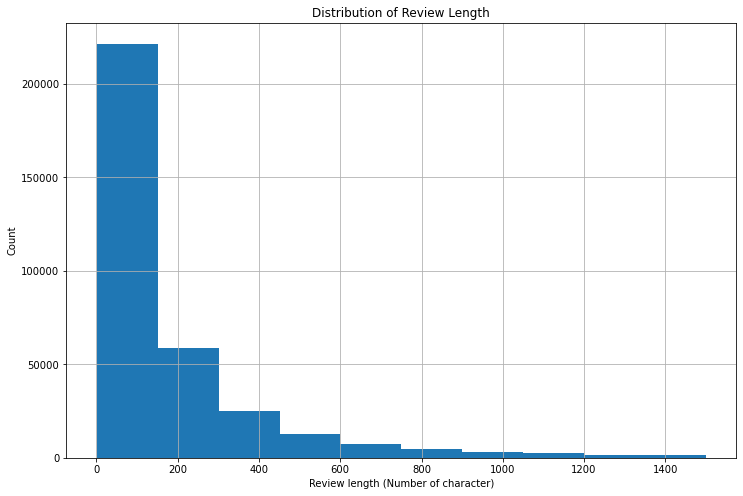

In [10]:
# Plot distribution of review length
review_length = data["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [11]:
#split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(data['Reviews'], data['Label'], test_size=0.1, random_state=0)
    
    
#If the label are words instead of numbers, they can be replaced programmatically using following two lines
#y_train = label_binarize(y_train, classes=[0, 1, 2])
#y_test = label_binarize(y_test, classes=[0, 1, 2])

In [12]:
# Preprocess text data in training set and validation set
x_train_cleaned = []
x_test_cleaned = []

for d in x_train:
    x_train_cleaned.append(cleanText(d))

for d in x_test:
    x_test_cleaned.append(cleanText(d)) 

In [13]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
x_train_countVect = countVect.fit_transform(x_train_cleaned)
print ("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print ("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 54166 

Show some feature names : 
 ['aa', 'aerial', 'andcamera', 'ascetics', 'baggies', 'birdwatching', 'broadcasters', 'cannoy', 'cherished', 'commend', 'consumo', 'crunched', 'deficient', 'diffcult', 'dong', 'electing', 'esper', 'expirience', 'finecamera', 'friendlier', 'girls', 'guessedit', 'hhi', 'ilemming', 'instagraming', 'iwhatever', 'lablel', 'literallyhave', 'maneuverable', 'microsost', 'movillnet', 'nicelooking', 'office', 'outreach', 'percentbecause', 'pla', 'prepain', 'providing', 'raving', 'regale', 'restoration', 'salgan', 'semipro', 'simscroll', 'solidarity', 'starr', 'superglue', 'telefonical', 'tidy', 'tricks', 'uninstallation', 'vampire', 'wapencmms', 'withxxex', 'yupp']


In [14]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(x_train_countVect, y_train)

MultinomialNB()

In [15]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(x_test_cleaned))
modelEvaluation(predictions, y_test)


Accuracy on validation set: 0.8552

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      8138
           1       0.45      0.26      0.33      2736
           2       0.90      0.94      0.92     23577

    accuracy                           0.86     34451
   macro avg       0.72      0.67      0.69     34451
weighted avg       0.84      0.86      0.85     34451


Confusion Matrix : 
 [[ 6594   370  1174]
 [  770   724  1242]
 [  923   508 22146]]


In [16]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
print ("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print ("Show some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features : 21131 

Show some feature names : 
 ['00', '9100', 'appearence', 'blinding', 'choked', 'cracked', 'directo', 'eq', 'floored', 'guidebook', 'indiscernible', 'leads', 'miami', 'occupied', 'pig', 'quedo', 'reviewedblackberry', 'shutting', 'studies', 'tmob', 'varies', 'youll']


In [17]:
#x_train_subset = tfidf.transform(x_train_cleaned[:100])
x_train_input = tfidf.transform(x_train_cleaned)
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(x_train_input, y_train)
y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))

In [18]:
modelEvaluation(y_svr_lin_predicted, y_test)


Accuracy on validation set: 0.8917

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8138
           1       0.73      0.25      0.37      2736
           2       0.92      0.97      0.94     23577

    accuracy                           0.89     34451
   macro avg       0.83      0.70      0.72     34451
weighted avg       0.88      0.89      0.88     34451


Confusion Matrix : 
 [[ 7218   114   806]
 [  847   676  1213]
 [  621   130 22826]]
